# Simple pipelines in `scikit-learn`

We are going to see how `scikit-learn` `Pipeline`s can help us to train and deploy machine learning models in an way that is maintainable and resistant to errors! 

Let's use a classic dataset for the purpose: the prediction of median house prices in regions of Boston as a function of other attributes of the regions:

In [1]:
import pandas as pd
boston = pd.read_csv("boston.csv")

In [2]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,NaN,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Just for reference, here are the descriptions of the features and target of the dataset:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollars
* PTRATIO - pupil-teacher ratio by town
* LSTAT - percentage of lower status of the population
* target - Median value of owner-occupied homes in 1000's of dollars

Our aim will be to develop a **regression model** for the target median price!

How many of the values in each column are missing?

In [3]:
boston.isnull().sum()

CRIM       20
ZN          0
INDUS      30
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT       0
target      0
dtype: int64

Let's also have a look at some descriptive statistics:

In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
count,486.000000,506.000000,476.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.653050,11.363636,11.139538,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.719588,23.322453,6.881949,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082268,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.689387,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Along with the correlation matrix amongst the features and target:

In [5]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
CRIM,1.000000,-0.198043,0.423260,-0.053110,0.419520,-0.227405,0.349394,-0.376952,0.623160,0.582676,0.287318,0.458549,-0.389693
ZN,-0.198043,1.000000,-0.532421,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.423260,-0.532421,1.000000,0.055586,0.758235,-0.380082,0.646991,-0.704750,0.585536,0.715208,0.370152,0.593128,-0.466700
CHAS,-0.053110,-0.042697,0.055586,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.419520,-0.516604,0.758235,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.227405,0.311991,-0.380082,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.349394,-0.569537,0.646991,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.376952,0.664408,-0.704750,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.623160,-0.311948,0.585536,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582676,-0.314563,0.715208,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


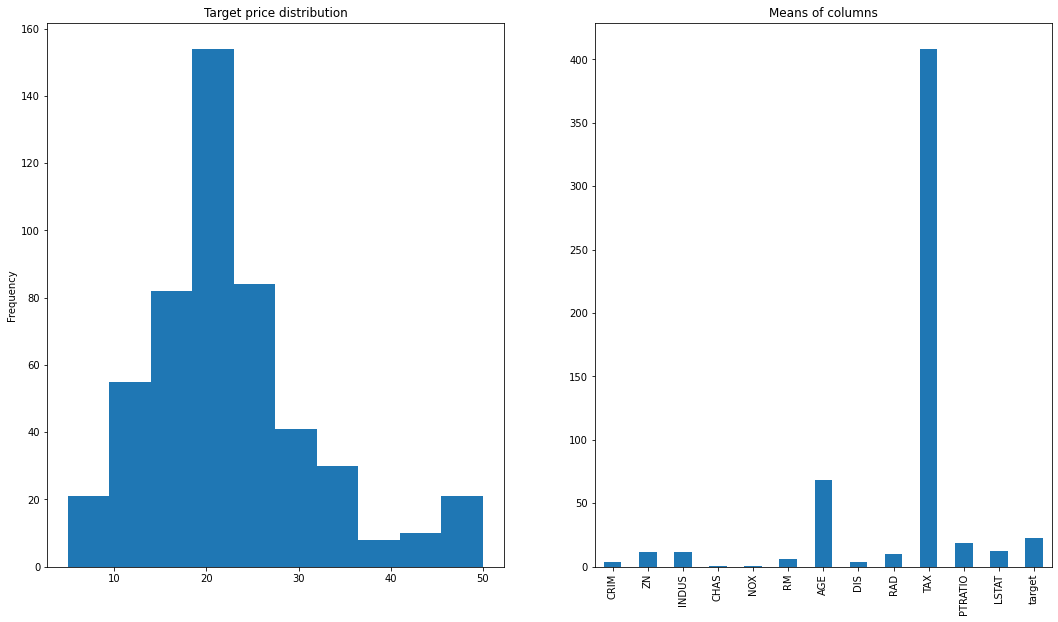

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize = (18, 10))
boston['target'].plot(
 title='Target price distribution', kind = 'hist', ax = axes[0]
)

boston[boston.columns].mean().plot(
 title='Means of columns', kind = 'bar', ax = axes[1]
)
fig.show()

# Splitting the dataset into training and testing sets

Best practice is to split the full dataset into training and testing sets before we go much further:

In [7]:
boston.shape

(506, 13)

In [8]:
X = boston.drop("target", axis = 1)
y = boston["target"]

X.shape, y.shape

((506, 12), (506,))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 12), (152, 12), (354,), (152,))

# Imputation

Most models available in `scikit-learn` will not tolerate data that contains missing values: they will throw an error if we try to fit them to such data. So we need to perform **imputation** of missing values in both training and testing sets. We are going to use the `SimpleImputer` from `scikit-learn` to do this.  
  
First, let's see a toy example of some data with missing values

In [11]:
import numpy as np

data_with_missing = pd.DataFrame([[7, 2, 3], [4, np.nan, 6], [None, 5, 9]], columns = ["a", "b", "c"])
data_with_missing

,a,b,c
0,7.0,2.0,3
1,4.0,NaN,6
2,NaN,5.0,9


Now let's load and fit a `SimpleImputer` and use it to transform our toy data:

In [12]:
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy = 'median')
imp_median.fit(data_with_missing)
imputed_data = imp_median.transform(data_with_missing)

imputed_data

array([[7. , 2. , 3. ],
       [4. , 3.5, 6. ],
       [5.5, 5. , 9. ]])

We can do this in one line using the `fit_transform()` method:

In [13]:
imputed_data = imp_median.fit_transform(data_with_missing)
imputed_data

array([[7. , 2. , 3. ],
       [4. , 3.5, 6. ],
       [5.5, 5. , 9. ]])

Now let's fit and use a simple imputer on our training data. First, how many missing values in the training data?

In [14]:
X_train.isnull().sum()

CRIM       12
ZN          0
INDUS      20
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT       0
dtype: int64

In [15]:
X_train = imp_median.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = X.columns)

X_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
dtype: int64

We can see that the `imp_median` object stores the calculated statistics necessary for the imputation: 

In [16]:
imp_median.statistics_

array([2.65535e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.17050e+00, 7.94500e+01, 3.26745e+00, 5.00000e+00, 3.29500e+02,
       1.91000e+01, 1.14900e+01])

# Scaling features

Next on our list of chores, we should probably **scale** our input features. Again, `scikit-learn` offers a nice class to do this: the `StandardScaler`! Let's see the problem we're dealing with, here are the means of the columns:

In [17]:
X_train.mean()

CRIM         3.726399
ZN          11.269774
INDUS       10.812768
CHAS         0.070621
NOX          0.556465
RM           6.263636
AGE         68.934463
DIS          3.846197
RAD          9.536723
TAX        405.443503
PTRATIO     18.464689
LSTAT       12.756667
dtype: float64

and here are their standard deviations:

In [18]:
X_train.std()

CRIM         9.150948
ZN          23.439633
INDUS        6.497864
CHAS         0.256554
NOX          0.116778
RM           0.704269
AGE         28.353734
DIS          2.132573
RAD          8.693396
TAX        167.330900
PTRATIO      2.222017
LSTAT        7.183746
dtype: float64

We can see they cover a wide range of scales. Let's fit and apply a `StandardScaler` to the training data:

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = X.columns)

In [20]:
X_train.mean()

CRIM       3.136223e-19
ZN        -2.195356e-17
INDUS     -1.254489e-16
CHAS       2.195356e-18
NOX       -6.716222e-16
RM         7.661793e-16
AGE       -3.443573e-16
DIS        9.785016e-17
RAD        4.892508e-17
TAX        8.530527e-17
PTRATIO    1.465243e-15
LSTAT     -1.414437e-16
dtype: float64

In [21]:
X_train.std()

CRIM       1.001415
ZN         1.001415
INDUS      1.001415
CHAS       1.001415
NOX        1.001415
RM         1.001415
AGE        1.001415
DIS        1.001415
RAD        1.001415
TAX        1.001415
PTRATIO    1.001415
LSTAT      1.001415
dtype: float64

Nice, that looks much better!

# Pipelines

We are building a problem for ourselves here in the way that we are coding our data wrangling and preprocessing steps. The main problem is that the code is liable to be quite difficult to **deploy** (by deploy, we mean put into production / hand-off to other colleagues). The `SimpleImputer` and `StandardScaler` have been fitted to the training set, and we will have to keep their fitted parameters with them in deployment.  Also, the code is quite sensitive to the order in which operations are performed. For example, fitting the `StandardScaler` before or after the imputation step will lead to different fitted parameters.

We could write our own functions and configuration files to encapsulate these processes, but `scikit-learn` has already beaten us to it with their `Pipeline` class!  
  
## Transformers and estimators

A `Pipeline` is a collection of `Transformer` and `Estimator` objects, but what are these:

* A `Transformer` has both `fit()` and `transform()` methods. These transform input data in some way.
* An `Estimator` has both `fit()` and `predict()` methods. These use input data to provide a prediction.

A `Pipeline` is typically a chain of `Transformer`s followed by an `Estimator`.  
  
Let's see how we might use a `Pipeline` to write a more encapsulated and maintainable version of the operations we wrote above!

In [22]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
])

We define our `pipe` as a sequence of `steps`. Each step is passed in as a `tuple` containing a name and a transformer object. Now let's resplit our data so we are back at the start:

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

and now we can run `fit_transform()` of the whole pipe on the training data!

In [24]:
pipe.fit_transform(X_train)

array([[-0.41842092, -0.49799437, -1.07151031, ..., -0.67491325,
        -0.83630132, -0.77105976],
       [-0.35402254, -0.49799437, -0.74887452, ..., -0.6079123 ,
        -0.47831986, -0.13422005],
       [-0.23249795, -0.49799437,  1.25897056, ..., -0.02317675,
        -1.68650729, -0.70777971],
       ...,
       [ 0.60241606, -0.49799437,  1.03687709, ...,  1.578755  ,
         0.77461525,  0.89711023],
       [-0.3796954 , -0.49799437, -0.19364082, ..., -0.62618528,
        -0.03084304, -0.36041259],
       [ 1.20798494, -0.49799437,  1.03687709, ...,  1.578755  ,
         0.77461525, -0.06959361]])

The `Pipeline` stores the parameters and settings neccessary to perform the transformation. Now we could use this pipeline to transform the test data. Note carefully here that we only want to use the pipeline to transform the test data. We do not want to re-fit the pipeline to the test data!

In [25]:
pipe.transform(X_test)

array([[ 0.70123195, -0.49799437,  1.03687709, ...,  1.578755  ,
         0.77461525,  0.5510895 ],
       [-0.38787897, -0.49799437, -0.22515409, ..., -0.0962687 ,
         0.32713843,  1.14349853],
       [-0.39078291, -0.49799437,  2.48348595, ...,  1.85284979,
         0.72986757,  2.29331062],
       ...,
       [-0.13259412, -0.49799437,  1.25897056, ..., -0.02317675,
        -1.68650729,  0.53897204],
       [-0.40363576, -0.49799437, -0.09009724, ..., -0.79064216,
         0.05865233,  0.62244786],
       [ 0.63337403, -0.49799437,  1.03687709, ...,  1.578755  ,
         0.77461525,  0.4824239 ]])

As earlier, let's just see that the individual steps of the `Pipeline` hold the data necessary for transformation:

In [26]:
pipe.named_steps.imputer.statistics_

array([2.6838e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.3800e-01,
       6.1750e+00, 7.6500e+01, 3.3175e+00, 5.0000e+00, 3.3000e+02,
       1.9100e+01, 1.1095e+01])

# Baseline model pipeline

Great, let's create a baseline model pipeline for the regression task! We'll do this using the `DummyRegressor` class:

In [27]:
from sklearn.dummy import DummyRegressor

pipe_dummy = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler()),
    ("regressor", DummyRegressor(strategy = "mean"))
])

pipe_dummy.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('regressor', DummyRegressor())])

What is this 'dummy' regressor? In a way, it's the simplest possible regression model: predict the **mean** (or median etc) value of `y` regardless of the features fed to it! This is a decent baseline - if our model doesn't outperform the dummy regressor then we are doing something badly wrong. So how does it perform?  

Let's calculate the mean absolute error, and remember we mainly want to check performance on the test set (although we also compare with the error on the training set to assess overfitting):

In [28]:
from sklearn.metrics import mean_absolute_error

y_train_predict = pipe_dummy.predict(X_train)
y_test_predict = pipe_dummy.predict(X_test)
print("MAE train", mean_absolute_error(y_train, y_train_predict))
print("MAE test", mean_absolute_error(y_test, y_test_predict))

MAE train 6.93018449360018
MAE test 6.119030627415998


Let's see this error in the context of the distribution of target prices in the Boston data as a whole! Let's get a boxplot of the prices: 

<AxesSubplot:>

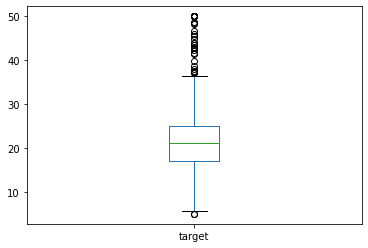

In [29]:
boston["target"].plot(kind = "box")

# Linear regression pipeline

Now let's fit a slightly more ambitious model, i.e. a multiple linear regression model:

In [30]:
from sklearn.linear_model import LinearRegression

pipe_linreg = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

pipe_linreg.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [31]:
y_train_predict = pipe_linreg.predict(X_train)
y_test_predict = pipe_linreg.predict(X_test)
print("MAE train", mean_absolute_error(y_train, y_train_predict))
print("MAE test", mean_absolute_error(y_test, y_test_predict))

MAE train 3.4049581762290533
MAE test 3.5274783482361713


Phew! It does better than the dummy pipeline, which is reassuring!

# The 'kitchen sink' approach - polynomial features

Our progress so far is encouraging! We've achieved better performance than baseline. We might try to go further and add in additional derived features. One obvious choice is to try **polynomial combinations** of features. So, for example, we might try adding polynomials up to the third power.  

Let's think about the `CRIM` variable. Third order polynomials means we add features like: `CRIM^3`, `CRIM^2 * ZN`, `CRIM^2 * INDUS`,... , `CRIM * ZN ^ 2`, `CRIM * INDUS^2`,... plus corresponding columns for all other features and all lower degrees. In other words, we end up with a huge number of derived features!  
  
Let's see how this performs:

In [32]:
from sklearn.preprocessing import PolynomialFeatures

pipe_linreg_poly = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "median")),
    ("poly", PolynomialFeatures(degree = 3, include_bias = False)),
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

pipe_linreg_poly.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [33]:
y_train_predict = pipe_linreg_poly.predict(X_train)
y_test_predict = pipe_linreg_poly.predict(X_test)
print("MAE train", mean_absolute_error(y_train, y_train_predict))
print("MAE test", mean_absolute_error(y_test, y_test_predict))

MAE train 3.2018246183689514e-10
MAE test 1136.6667411911712


**Task - 2 mins**  

Interpret these MAE values on training and testing sets. What do you think is happening here?

**Solution**  

It looks like the model is **overfitting** heavily! We get a tiny error on the training set, and a much bigger error on the test set, so we are heavily fitting noise in the training data.

# Regularising the regression

Argh! We think *some* of the polynomial features are probably helpful, but we are being swamped by the number of derived features! How do we fight our way through this maze of possible models to arrive at a decent model that doesn't overfit the training set but still improves on the linear regression without derived features?  
  
A possible and strong solution to this is the idea of **regularised** regression. Regularisation is the process of **penalising** the regression coefficients for getting too large - we have a penalty called **alpha** that we vary to **tune** the model:

* *high* alpha leads to *strong* penalisation of coefficients. This leads to a model with more **bias** (i.e. one that is liable to underfit the training data)
* *low* alpha leads to *weak* penalisation of coefficients. This leads to a model with more **variance** (i.e. one that is liable to overfit the training data)

The idea is that we treat alpha as a hyperparameter to be tuned using **cross validation**. There are two main algorithms for this: **Lasso regression** and **Ridge regression**. Lasso has the ability to set some regression coefficients to zero, so you can think of it as automatically performing feature selection!

Fortunately, `scikit-learn` makes this pretty easy. Let's use an implementation of the Lasso algorithm with cross-validation 'built-in' to it. This model will essentially 'auto-tune' itself to try to select the optimal alpha value! 

In [34]:
from sklearn.linear_model import LassoLarsCV

pipe_lasso_poly = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "median")),
    ("poly", PolynomialFeatures(degree = 3, include_bias = False)),
    ("scaler", StandardScaler()),
    ("regressor", LassoLarsCV(max_iter = 50))
])

pipe_lasso_poly.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', LassoLarsCV(max_iter=50))])

In [35]:
y_train_predict = pipe_lasso_poly.predict(X_train)
y_test_predict = pipe_lasso_poly.predict(X_test)
print("MAE train", mean_absolute_error(y_train, y_train_predict))
print("MAE test", mean_absolute_error(y_test, y_test_predict))

MAE train 2.2296822723005736
MAE test 2.792861184809466


Neat! This looks like it has done an excellent job of improving on the standard linear regression without overfitting. How many possible coefficients were there in the training data with polynomial features?

In [36]:
pipe_lasso_poly.named_steps.regressor.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.04811516e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [37]:
len(pipe_lasso_poly.named_steps.regressor.coef_)

454

And how many of these possible coefficients were found by the Lasso regression to be non-zero?

In [38]:
sum(pipe_lasso_poly.named_steps.regressor.coef_ != 0)

23

So you can see the Lasso regression has performed some rather drastic feature selection. You could next dig down into these coefficients to find out what features they correspond to etc, look at relative importances etc...

# Saving and deploying models

We've found a model we're happy with, and we'd like to save the fitted `Pipeline` to perhaps be shared with others / loaded in to other applications. How can we do this? 

There are a number of possibilities, but sticking to the Python infrastructure, the easiest way is to **pickle** the pipe!

In [39]:
import pickle

pickle.dump(pipe_lasso_poly, open("finalised_model.pkl", mode = "wb"))

So we dump the pipeline to a *binary* file. All of the fitted parameters etc. are stored inside this pickle file. Now we might send the file to a colleague working on a different computer and/or perhaps deploy the model as a web service using a web framework like `Flask` or `Django`. 

Imagine you are on a different computer, and you want to use the model you've been sent. It's as simple as loading it:

In [40]:
loaded_model = pickle.load(open("finalised_model.pkl", mode = "rb"))

Now let's also pretend we have a new set of data we want to run through the model for a prediction of target price. Let's just sample a random row from `X_test` to simulate this:

In [41]:
input_data = X_test.sample(n = 1, axis = 0)
input_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
288,0.0459,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,7.6


What does the model predict for target price, given this data?

In [42]:
loaded_model.predict(input_data)

array([25.4301381])

## Deploying

Now we could deploy our model as a simple API using the Flask web server. We've included a file `simple_api.py` that you can run at your command line using `python simple_api.py`. You will now have a server running on your laptop. In `Insomnia`, try sending a `POST` request to http://0.0.0.0:5000/api/ including a JSON body with your data, e.g. `[0.0459, 52.5, 5.32, 0.0, 0.405, 6.315, 45.6, 7.3172, 6.0, 293.0, 16.6, 7.6]`. You should receive a prediction back in the response.

In principle, this server code could be run not just on your laptop but in the cloud somewhere. Of course, if you were deploying this properly, you would need to worry about authorising users, using a secured server etc!

Here's the code in the server file:

```
from flask import Flask, request, redirect, url_for, flash, jsonify
import numpy as np
import pickle 
import json


app = Flask(__name__)


@app.route('/api/', methods=['POST'])
def makecalc():
    data = request.get_json()
    data = np.array(data).reshape(1, -1)
    prediction = np.array2string(model.predict(data))

    return jsonify(prediction)

if __name__ == '__main__':
    modelfile = 'finalised_model.pkl'
    model = pickle.load(open(modelfile, 'rb'))
    app.run(debug=True, host='0.0.0.0')
```